In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.h5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

/Users/tobi/Documents/coe197z/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,086 (4.24 KB)

 Trainable params: 1,086 (4.24 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 7s 565ms/step - accuracy: 0.4141 - loss: 1.3392
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4633 - loss: 1.3255 - val_accuracy: 0.5358 - val_loss: 1.2338
Epoch 2/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4844 - loss: 1.2842
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5171 - loss: 1.2451 - val_accuracy: 0.5390 - val_loss: 1.1589
Epoch 3/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5625 - loss: 1.1897
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5535 - loss: 1.1606 - val_accuracy: 0.5453 - val_loss: 1.1095
Epoch 4/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5625 - loss: 1.0596
Epoch 4: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5714 - loss: 1.0994 - val_accuracy: 0.5517 - val_loss: 1.0797
Epoch 5/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5859 - loss: 1.0803
Epoch 5: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5775 - loss: 1.0795 - val_accuracy: 0.5548 - val_loss: 1.0585
Epoch 6/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5625 - loss: 1.0946
Epoch 6: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5626 - loss: 1.0789 - val_accuracy: 0.5548 - val_loss: 1.0395
Epoch 7/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6250 - loss: 1.0489
Epoch 7: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5734 - loss: 1.0586 - val_accuracy: 0.5548 - val_loss: 1.0225
Epoch 8/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6016 - loss: 1.0198
Epoch 8: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5752 - loss: 1.0244 - val_accuracy: 0.5548 - val_loss: 1.0045
Epoch 9/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5781 - loss: 1.0035
Epoch 9: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5745 - loss: 1.0155 - val_accuracy: 0.5548 - val_loss: 0.9889
Epoch 10/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5469 - loss: 0.9897
Epoch 10: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5648 - loss: 1.0032 - val_accuracy: 0.5548 - val_loss: 0.9715
Epoch 11/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5625 - loss: 0.9851
Epoch 11: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5753 - loss: 0.9712 - val_accuracy: 0.5548 - val_loss: 0.9535
Epoch 12/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6094 - loss: 0.9509
Epoch 12: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5623 - loss: 0.9779 - val_accuracy: 0.5548 - val_loss: 0.9348
Epoch 13/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5625 - loss: 0.9542
Epoch 13: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5677 - loss: 0.9501 - val_accuracy: 0.5548 - val_loss: 0.9149
Epoch 14/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5859 - loss: 0.9467
Epoch 14: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5789 - loss: 0.9314 - val_accuracy: 0.5548 - val_loss: 0.8953
Epoch 15/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6641 - loss: 0.8522
Epoch 15: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6018 - loss: 0.8915 - val_accuracy: 0.5548 - val_loss: 0.8781
Epoch 16/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6562 - loss: 0.8210
Epoch 16: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5924 - loss: 0.8852 - val_accuracy: 0.5548 - val_loss: 0.8596
Epoch 17/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5859 - loss: 0.8872
Epoch 17: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5761 - loss: 0.8900 - val_accuracy: 0.5548 - val_loss: 0.8457
Epoch 18/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5469 - loss: 0.9041
Epoch 18: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5852 - loss: 0.8646 - val_accuracy: 0.5548 - val_loss: 0.8338
Epoch 19/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5469 - loss: 0.8741
Epoch 19: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5781 - loss: 0.8587 - val_accuracy: 0.5548 - val_loss: 0.8236
Epoch 20/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6406 - loss: 0.7401
Epoch 20: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5960 - loss: 0.8287 - val_accuracy: 0.5882 - val_loss: 0.8095
Epoch 21/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5781 - loss: 0.8647
Epoch 21: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5854 - loss: 0.8407 - val_accuracy: 0.6264 - val_loss: 0.7990
Epoch 22/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5312 - loss: 0.8628
Epoch 22: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5834 - loss: 0.8298 - val_accuracy: 0.6614 - val_loss: 0.7896
Epoch 23/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7031 - loss: 0.7012
Epoch 23: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6146 - loss: 0.8017 - val_accuracy: 0.7027 - val_loss: 0.7743
Epoch 24/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5469 - loss: 0.8558
Epoch 24: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6074 - loss: 0.8023 - val_accuracy: 0.7218 - val_loss: 0.7639
Epoch 25/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5938 - loss: 0.7800
Epoch 25: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6021 - loss: 0.7947 - val_accuracy: 0.7377 - val_loss: 0.7542
Epoch 26/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6016 - loss: 0.7795
Epoch 26: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6105 - loss: 0.7822 - val_accuracy: 0.7583 - val_loss: 0.7441
Epoch 27/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6641 - loss: 0.7519
Epoch 27: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6273 - loss: 0.7688 - val_accuracy: 0.7520 - val_loss: 0.7307
Epoch 28/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6016 - loss: 0.7859
Epoch 28: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6060 - loss: 0.7794 - val_accuracy: 0.7711 - val_loss: 0.7241
Epoch 29/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6172 - loss: 0.8134
Epoch 29: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6343 - loss: 0.7634 - val_accuracy: 0.7663 - val_loss: 0.7109
Epoch 30/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6719 - loss: 0.7361
Epoch 30: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6376 - loss: 0.7605 - val_accuracy: 0.7647 - val_loss: 0.7003
Epoch 31/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5703 - loss: 0.7810
Epoch 31: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6268 - loss: 0.7555 - val_accuracy: 0.7663 - val_loss: 0.6907
Epoch 32/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6328 - loss: 0.7561
Epoch 32: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6377 - loss: 0.7404 - val_accuracy: 0.7631 - val_loss: 0.6814
Epoch 33/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6562 - loss: 0.7005
Epoch 33: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6393 - loss: 0.7315 - val_accuracy: 0.7647 - val_loss: 0.6709
Epoch 34/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6875 - loss: 0.6870
Epoch 34: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6668 - loss: 0.7121 - val_accuracy: 0.7599 - val_loss: 0.6585
Epoch 35/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6797 - loss: 0.6769
Epoch 35: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6604 - loss: 0.7145 - val_accuracy: 0.7568 - val_loss: 0.6478
Epoch 36/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6406 - loss: 0.7730
Epoch 36: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6478 - loss: 0.7216 - val_accuracy: 0.7599 - val_loss: 0.6374
Epoch 37/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6562 - loss: 0.7011
Epoch 37: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6493 - loss: 0.7153 - val_accuracy: 0.7568 - val_loss: 0.6336
Epoch 38/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6406 - loss: 0.7202
Epoch 38: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6597 - loss: 0.7015 - val_accuracy: 0.7568 - val_loss: 0.6266
Epoch 39/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6641 - loss: 0.7127
Epoch 39: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6642 - loss: 0.6864 - val_accuracy: 0.7568 - val_loss: 0.6134
Epoch 40/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6484 - loss: 0.7374
Epoch 40: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6619 - loss: 0.6940 - val_accuracy: 0.7615 - val_loss: 0.6031
Epoch 41/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6328 - loss: 0.7088
Epoch 41: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6535 - loss: 0.6942 - val_accuracy: 0.7552 - val_loss: 0.5957
Epoch 42/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6562 - loss: 0.6362
Epoch 42: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6519 - loss: 0.6778 - val_accuracy: 0.7568 - val_loss: 0.5915
Epoch 43/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7422 - loss: 0.6446
Epoch 43: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6874 - loss: 0.6595 - val_accuracy: 0.7615 - val_loss: 0.5778
Epoch 44/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6172 - loss: 0.7347
Epoch 44: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6693 - loss: 0.6754 - val_accuracy: 0.7536 - val_loss: 0.5746
Epoch 45/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6328 - loss: 0.7347
Epoch 45: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6885 - loss: 0.6642 - val_accuracy: 0.7504 - val_loss: 0.5713
Epoch 46/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6719 - loss: 0.5861
Epoch 46: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6707 - loss: 0.6539 - val_accuracy: 0.7520 - val_loss: 0.5642
Epoch 47/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6250 - loss: 0.7098
Epoch 47: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6675 - loss: 0.6776 - val_accuracy: 0.7536 - val_loss: 0.5646
Epoch 48/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7188 - loss: 0.6049
Epoch 48: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6968 - loss: 0.6373 - val_accuracy: 0.7552 - val_loss: 0.5559
Epoch 49/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6172 - loss: 0.7589
Epoch 49: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6672 - loss: 0.6659 - val_accuracy: 0.7552 - val_loss: 0.5500
Epoch 50/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7656 - loss: 0.6163
Epoch 50: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7095 - loss: 0.6273 - val_accuracy: 0.7583 - val_loss: 0.5413
Epoch 51/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6328 - loss: 0.6955
Epoch 51: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6767 - loss: 0.6461 - val_accuracy: 0.7742 - val_loss: 0.5406
Epoch 52/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6484 - loss: 0.7041
Epoch 52: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6887 - loss: 0.6406 - val_accuracy: 0.8172 - val_loss: 0.5310
Epoch 53/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6719 - loss: 0.6125
Epoch 53: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6938 - loss: 0.6199 - val_accuracy: 0.8140 - val_loss: 0.5209
Epoch 54/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6406 - loss: 0.6891
Epoch 54: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6774 - loss: 0.6497 - val_accuracy: 0.8426 - val_loss: 0.5203
Epoch 55/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7188 - loss: 0.6032
Epoch 55: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7039 - loss: 0.6070 - val_accuracy: 0.8124 - val_loss: 0.5174
Epoch 56/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6875 - loss: 0.6474
Epoch 56: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7184 - loss: 0.6162 - val_accuracy: 0.8140 - val_loss: 0.5120
Epoch 57/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7344 - loss: 0.6417
Epoch 57: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7146 - loss: 0.6221 - val_accuracy: 0.8569 - val_loss: 0.5092
Epoch 58/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7188 - loss: 0.5944
Epoch 58: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7053 - loss: 0.6090 - val_accuracy: 0.8394 - val_loss: 0.5021
Epoch 59/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6406 - loss: 0.6441
Epoch 59: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6929 - loss: 0.6286 - val_accuracy: 0.8235 - val_loss: 0.5060
Epoch 60/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6953 - loss: 0.5895
Epoch 60: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7063 - loss: 0.6032 - val_accuracy: 0.7917 - val_loss: 0.4992
Epoch 61/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6953 - loss: 0.6301
Epoch 61: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7016 - loss: 0.6035 - val_accuracy: 0.8601 - val_loss: 0.4960
Epoch 62/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7500 - loss: 0.5427
Epoch 62: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6964 - loss: 0.5996 - val_accuracy: 0.8537 - val_loss: 0.4860
Epoch 63/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6875 - loss: 0.5515
Epoch 63: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: 0.5834 - val_accuracy: 0.8490 - val_loss: 0.4864
Epoch 64/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6484 - loss: 0.6367
Epoch 64: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7011 - loss: 0.6097 - val_accuracy: 0.8601 - val_loss: 0.4869
Epoch 65/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7031 - loss: 0.5689
Epoch 65: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7419 - loss: 0.5649 - val_accuracy: 0.8680 - val_loss: 0.4806
Epoch 66/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7188 - loss: 0.6205
Epoch 66: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7290 - loss: 0.5883 - val_accuracy: 0.8601 - val_loss: 0.4756
Epoch 67/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7031 - loss: 0.6351
Epoch 67: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7348 - loss: 0.6012 - val_accuracy: 0.8792 - val_loss: 0.4784
Epoch 68/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7266 - loss: 0.6414
Epoch 68: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7372 - loss: 0.5836 - val_accuracy: 0.8839 - val_loss: 0.4724
Epoch 69/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7266 - loss: 0.5705
Epoch 69: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7251 - loss: 0.5817 - val_accuracy: 0.8919 - val_loss: 0.4618
Epoch 70/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6953 - loss: 0.5835
Epoch 70: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7298 - loss: 0.5675 - val_accuracy: 0.8665 - val_loss: 0.4594
Epoch 71/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7812 - loss: 0.5205
Epoch 71: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7435 - loss: 0.5752 - val_accuracy: 0.8696 - val_loss: 0.4614
Epoch 72/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7656 - loss: 0.5330
Epoch 72: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7551 - loss: 0.5465 - val_accuracy: 0.8839 - val_loss: 0.4572
Epoch 73/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7266 - loss: 0.6215
Epoch 73: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7362 - loss: 0.5654 - val_accuracy: 0.8792 - val_loss: 0.4536
Epoch 74/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7734 - loss: 0.5241
Epoch 74: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7478 - loss: 0.5507 - val_accuracy: 0.8871 - val_loss: 0.4485
Epoch 75/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7109 - loss: 0.5627
Epoch 75: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7592 - loss: 0.5493 - val_accuracy: 0.8871 - val_loss: 0.4440
Epoch 76/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7109 - loss: 0.5779
Epoch 76: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7346 - loss: 0.5815 - val_accuracy: 0.8983 - val_loss: 0.4493
Epoch 77/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7812 - loss: 0.6058
Epoch 77: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7619 - loss: 0.5621 - val_accuracy: 0.8919 - val_loss: 0.4439
Epoch 78/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7812 - loss: 0.4941
Epoch 78: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7709 - loss: 0.5268 - val_accuracy: 0.8871 - val_loss: 0.4457
Epoch 79/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7734 - loss: 0.5913
Epoch 79: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7697 - loss: 0.5422 - val_accuracy: 0.9030 - val_loss: 0.4340
Epoch 80/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7344 - loss: 0.5176
Epoch 80: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7354 - loss: 0.5530 - val_accuracy: 0.8935 - val_loss: 0.4393
Epoch 81/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7344 - loss: 0.5502
Epoch 81: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7299 - loss: 0.5665 - val_accuracy: 0.8983 - val_loss: 0.4370
Epoch 82/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7656 - loss: 0.5609
Epoch 82: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7490 - loss: 0.5665 - val_accuracy: 0.8871 - val_loss: 0.4411
Epoch 83/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7891 - loss: 0.5030
Epoch 83: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7635 - loss: 0.5301 - val_accuracy: 0.8967 - val_loss: 0.4360
Epoch 84/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8047 - loss: 0.5009
Epoch 84: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7634 - loss: 0.5277 - val_accuracy: 0.8919 - val_loss: 0.4365
Epoch 85/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7266 - loss: 0.5433
Epoch 85: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7636 - loss: 0.5279 - val_accuracy: 0.8998 - val_loss: 0.4294
Epoch 86/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7422 - loss: 0.5082
Epoch 86: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7566 - loss: 0.5225 - val_accuracy: 0.9014 - val_loss: 0.4233
Epoch 87/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7266 - loss: 0.5512
Epoch 87: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7619 - loss: 0.5291 - val_accuracy: 0.9014 - val_loss: 0.4232
Epoch 88/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7188 - loss: 0.5979
Epoch 88: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7482 - loss: 0.5701 - val_accuracy: 0.9078 - val_loss: 0.4192
Epoch 89/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8359 - loss: 0.4644
Epoch 89: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7807 - loss: 0.5165 - val_accuracy: 0.9094 - val_loss: 0.4089
Epoch 90/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7734 - loss: 0.5613
Epoch 90: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7638 - loss: 0.5394 - val_accuracy: 0.9078 - val_loss: 0.4122
Epoch 91/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7500 - loss: 0.5786
Epoch 91: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7609 - loss: 0.5375 - val_accuracy: 0.9030 - val_loss: 0.4135
Epoch 92/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7578 - loss: 0.5440
Epoch 92: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7572 - loss: 0.5457 - val_accuracy: 0.9078 - val_loss: 0.4136
Epoch 93/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7266 - loss: 0.5332
Epoch 93: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7776 - loss: 0.5275 - val_accuracy: 0.9046 - val_loss: 0.4081
Epoch 94/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7266 - loss: 0.5810
Epoch 94: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7710 - loss: 0.5058 - val_accuracy: 0.9062 - val_loss: 0.4039
Epoch 95/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7109 - loss: 0.5526
Epoch 95: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7609 - loss: 0.5485 - val_accuracy: 0.9030 - val_loss: 0.4078
Epoch 96/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7578 - loss: 0.5418
Epoch 96: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7817 - loss: 0.5139 - val_accuracy: 0.8983 - val_loss: 0.4077
Epoch 97/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.4729
Epoch 97: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7921 - loss: 0.5199 - val_accuracy: 0.9014 - val_loss: 0.3989
Epoch 98/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7969 - loss: 0.4991
Epoch 98: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7839 - loss: 0.5196 - val_accuracy: 0.9078 - val_loss: 0.3934
Epoch 99/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8594 - loss: 0.4783
Epoch 99: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7998 - loss: 0.4935 - val_accuracy: 0.8983 - val_loss: 0.3990
Epoch 100/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7734 - loss: 0.5443
Epoch 100: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7879 - loss: 0.5218 - val_accuracy: 0.9014 - val_loss: 0.3980
Epoch 101/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8047 - loss: 0.5242
Epoch 101: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.5154 - val_accuracy: 0.8998 - val_loss: 0.4002
Epoch 102/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.4880
Epoch 102: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8008 - loss: 0.4934 - val_accuracy: 0.9014 - val_loss: 0.4006
Epoch 103/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8047 - loss: 0.5570
Epoch 103: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7970 - loss: 0.5093 - val_accuracy: 0.8998 - val_loss: 0.3950
Epoch 104/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.4582
Epoch 104: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7925 - loss: 0.5009 - val_accuracy: 0.8951 - val_loss: 0.3985
Epoch 105/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8594 - loss: 0.4813
Epoch 105: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7950 - loss: 0.5156 - val_accuracy: 0.9014 - val_loss: 0.3886
Epoch 106/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7891 - loss: 0.5163
Epoch 106: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7803 - loss: 0.5174 - val_accuracy: 0.9014 - val_loss: 0.3925
Epoch 107/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8438 - loss: 0.3887
Epoch 107: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7777 - loss: 0.4977 - val_accuracy: 0.8998 - val_loss: 0.3908
Epoch 108/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.4609
Epoch 108: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8092 - loss: 0.4913 - val_accuracy: 0.8967 - val_loss: 0.3895
Epoch 109/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8359 - loss: 0.4915
Epoch 109: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8093 - loss: 0.4761 - val_accuracy: 0.9062 - val_loss: 0.3760
Epoch 110/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7969 - loss: 0.4111
Epoch 110: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7995 - loss: 0.4819 - val_accuracy: 0.9062 - val_loss: 0.3748
Epoch 111/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7734 - loss: 0.4845
Epoch 111: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7922 - loss: 0.4928 - val_accuracy: 0.9126 - val_loss: 0.3751
Epoch 112/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7578 - loss: 0.5225
Epoch 112: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7778 - loss: 0.5113 - val_accuracy: 0.9110 - val_loss: 0.3757
Epoch 113/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8047 - loss: 0.4903
Epoch 113: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.4906 - val_accuracy: 0.9046 - val_loss: 0.3774
Epoch 114/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8359 - loss: 0.4572
Epoch 114: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7839 - loss: 0.5079 - val_accuracy: 0.9046 - val_loss: 0.3787
Epoch 115/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8359 - loss: 0.4878
Epoch 115: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8018 - loss: 0.4780 - val_accuracy: 0.8998 - val_loss: 0.3761
Epoch 116/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.4599
Epoch 116: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8034 - loss: 0.4811 - val_accuracy: 0.9046 - val_loss: 0.3665
Epoch 117/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7422 - loss: 0.5185
Epoch 117: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7794 - loss: 0.4947 - val_accuracy: 0.9030 - val_loss: 0.3697
Epoch 118/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7734 - loss: 0.5488
Epoch 118: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8083 - loss: 0.4758 - val_accuracy: 0.9094 - val_loss: 0.3664
Epoch 119/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7656 - loss: 0.5001
Epoch 119: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - loss: 0.5066 - val_accuracy: 0.8998 - val_loss: 0.3685
Epoch 120/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7266 - loss: 0.5083
Epoch 120: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8171 - loss: 0.4614 - val_accuracy: 0.9030 - val_loss: 0.3635
Epoch 121/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8359 - loss: 0.4484
Epoch 121: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8070 - loss: 0.4728 - val_accuracy: 0.8983 - val_loss: 0.3679
Epoch 122/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7812 - loss: 0.4846
Epoch 122: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7993 - loss: 0.4767 - val_accuracy: 0.9030 - val_loss: 0.3632
Epoch 123/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7969 - loss: 0.4971
Epoch 123: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8189 - loss: 0.4483 - val_accuracy: 0.9046 - val_loss: 0.3556
Epoch 124/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.4207
Epoch 124: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8047 - loss: 0.4682 - val_accuracy: 0.9030 - val_loss: 0.3536
Epoch 125/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8047 - loss: 0.5431
Epoch 125: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8138 - loss: 0.4789 - val_accuracy: 0.9046 - val_loss: 0.3583
Epoch 126/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7656 - loss: 0.4827
Epoch 126: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7926 - loss: 0.4760 - val_accuracy: 0.9014 - val_loss: 0.3666
Epoch 127/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.4113
Epoch 127: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8293 - loss: 0.4517 - val_accuracy: 0.9014 - val_loss: 0.3598
Epoch 128/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8047 - loss: 0.5517
Epoch 128: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8145 - loss: 0.4900 - val_accuracy: 0.9062 - val_loss: 0.3532
Epoch 129/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7734 - loss: 0.5883
Epoch 129: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8102 - loss: 0.4881 - val_accuracy: 0.9014 - val_loss: 0.3609
Epoch 130/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7812 - loss: 0.4385
Epoch 130: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8121 - loss: 0.4710 - val_accuracy: 0.9046 - val_loss: 0.3561
Epoch 131/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.5027
Epoch 131: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8186 - loss: 0.4753 - val_accuracy: 0.9046 - val_loss: 0.3570
Epoch 132/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7891 - loss: 0.5023
Epoch 132: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8288 - loss: 0.4479 - val_accuracy: 0.9062 - val_loss: 0.3513
Epoch 133/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7656 - loss: 0.5453
Epoch 133: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8024 - loss: 0.4815 - val_accuracy: 0.9030 - val_loss: 0.3605
Epoch 134/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8359 - loss: 0.4008
Epoch 134: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8217 - loss: 0.4559 - val_accuracy: 0.9046 - val_loss: 0.3467
Epoch 135/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8047 - loss: 0.4447
Epoch 135: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8058 - loss: 0.4677 - val_accuracy: 0.9030 - val_loss: 0.3513
Epoch 136/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8203 - loss: 0.4028
Epoch 136: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8206 - loss: 0.4606 - val_accuracy: 0.9046 - val_loss: 0.3547
Epoch 137/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8516 - loss: 0.4053
Epoch 137: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.4568 - val_accuracy: 0.9062 - val_loss: 0.3428
Epoch 138/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8203 - loss: 0.5223
Epoch 138: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8073 - loss: 0.4984 - val_accuracy: 0.9062 - val_loss: 0.3475
Epoch 139/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7656 - loss: 0.5442
Epoch 139: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8226 - loss: 0.4570 - val_accuracy: 0.9046 - val_loss: 0.3419
Epoch 140/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7656 - loss: 0.5675
Epoch 140: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8076 - loss: 0.4879 - val_accuracy: 0.8998 - val_loss: 0.3507
Epoch 141/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8594 - loss: 0.3810
Epoch 141: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8193 - loss: 0.4581 - val_accuracy: 0.9030 - val_loss: 0.3498
Epoch 142/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8750 - loss: 0.3950
Epoch 142: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8245 - loss: 0.4470 - val_accuracy: 0.9046 - val_loss: 0.3492
Epoch 143/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8516 - loss: 0.4394
Epoch 143: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8257 - loss: 0.4567 - val_accuracy: 0.9030 - val_loss: 0.3496
Epoch 144/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8516 - loss: 0.4776
Epoch 144: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8355 - loss: 0.4452 - val_accuracy: 0.9046 - val_loss: 0.3465
Epoch 145/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8438 - loss: 0.3708
Epoch 145: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8338 - loss: 0.4391 - val_accuracy: 0.9030 - val_loss: 0.3440
Epoch 146/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8359 - loss: 0.4558
Epoch 146: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8174 - loss: 0.4681 - val_accuracy: 0.8998 - val_loss: 0.3458
Epoch 147/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8125 - loss: 0.5162
Epoch 147: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8132 - loss: 0.4582 - val_accuracy: 0.9014 - val_loss: 0.3437
Epoch 148/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7734 - loss: 0.4409
Epoch 148: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8234 - loss: 0.4385 - val_accuracy: 0.9030 - val_loss: 0.3419
Epoch 149/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.4605
Epoch 149: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8211 - loss: 0.4577 - val_accuracy: 0.9014 - val_loss: 0.3498
Epoch 150/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8203 - loss: 0.5587
Epoch 150: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8280 - loss: 0.4577 - val_accuracy: 0.9030 - val_loss: 0.3339
Epoch 151/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7969 - loss: 0.5188
Epoch 151: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8188 - loss: 0.4632 - val_accuracy: 0.8983 - val_loss: 0.3436
Epoch 152/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8594 - loss: 0.4156
Epoch 152: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8397 - loss: 0.4142 - val_accuracy: 0.9046 - val_loss: 0.3333
Epoch 153/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8047 - loss: 0.4602
Epoch 153: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8164 - loss: 0.4683 - val_accuracy: 0.9030 - val_loss: 0.3393
Epoch 154/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8047 - loss: 0.5200
Epoch 154: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8270 - loss: 0.4564 - val_accuracy: 0.9030 - val_loss: 0.3358
Epoch 155/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7969 - loss: 0.4464
Epoch 155: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8288 - loss: 0.4373 - val_accuracy: 0.9030 - val_loss: 0.3369
Epoch 156/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8594 - loss: 0.4158
Epoch 156: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8264 - loss: 0.4304 - val_accuracy: 0.9046 - val_loss: 0.3303
Epoch 157/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8438 - loss: 0.3863
Epoch 157: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8217 - loss: 0.4434 - val_accuracy: 0.9030 - val_loss: 0.3326
Epoch 158/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7891 - loss: 0.4688
Epoch 158: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8302 - loss: 0.4254 - val_accuracy: 0.9062 - val_loss: 0.3271
Epoch 159/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.4842
Epoch 159: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8328 - loss: 0.4412 - val_accuracy: 0.8983 - val_loss: 0.3377
Epoch 160/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8438 - loss: 0.3750
Epoch 160: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8410 - loss: 0.4207 - val_accuracy: 0.8951 - val_loss: 0.3411
Epoch 161/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8047 - loss: 0.4473
Epoch 161: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8300 - loss: 0.4195 - val_accuracy: 0.8951 - val_loss: 0.3340
Epoch 162/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7891 - loss: 0.6126
Epoch 162: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8198 - loss: 0.4750 - val_accuracy: 0.9046 - val_loss: 0.3337
Epoch 163/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8203 - loss: 0.3842
Epoch 163: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8216 - loss: 0.4426 - val_accuracy: 0.8967 - val_loss: 0.3476
Epoch 164/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.4217
Epoch 164: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8312 - loss: 0.4306 - val_accuracy: 0.9014 - val_loss: 0.3360
Epoch 165/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8828 - loss: 0.4723
Epoch 165: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8440 - loss: 0.4373 - val_accuracy: 0.9046 - val_loss: 0.3278
Epoch 166/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8438 - loss: 0.4242
Epoch 166: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8218 - loss: 0.4446 - val_accuracy: 0.8983 - val_loss: 0.3339
Epoch 167/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7969 - loss: 0.4486
Epoch 167: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8368 - loss: 0.4236 - val_accuracy: 0.8998 - val_loss: 0.3335
Epoch 168/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8672 - loss: 0.3844
Epoch 168: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8421 - loss: 0.4207 - val_accuracy: 0.8998 - val_loss: 0.3358
Epoch 169/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8516 - loss: 0.3735
Epoch 169: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8352 - loss: 0.4206 - val_accuracy: 0.9046 - val_loss: 0.3311
Epoch 170/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.3861
Epoch 170: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8252 - loss: 0.4272 - val_accuracy: 0.9046 - val_loss: 0.3302
Epoch 171/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8516 - loss: 0.4505
Epoch 171: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8344 - loss: 0.4342 - val_accuracy: 0.9062 - val_loss: 0.3246
Epoch 172/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8047 - loss: 0.4665
Epoch 172: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8260 - loss: 0.4359 - val_accuracy: 0.8983 - val_loss: 0.3305
Epoch 173/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.4357
Epoch 173: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8331 - loss: 0.4256 - val_accuracy: 0.8983 - val_loss: 0.3315
Epoch 174/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.4570
Epoch 174: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8278 - loss: 0.4344 - val_accuracy: 0.8903 - val_loss: 0.3395
Epoch 175/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8359 - loss: 0.4275
Epoch 175: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8284 - loss: 0.4540 - val_accuracy: 0.8903 - val_loss: 0.3337
Epoch 176/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8359 - loss: 0.4954
Epoch 176: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8301 - loss: 0.4254 - val_accuracy: 0.8998 - val_loss: 0.3309
Epoch 177/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.3885
Epoch 177: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8322 - loss: 0.4168 - val_accuracy: 0.8998 - val_loss: 0.3322
Epoch 178/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8750 - loss: 0.3606
Epoch 178: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8405 - loss: 0.4008 - val_accuracy: 0.9030 - val_loss: 0.3275
Epoch 179/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8125 - loss: 0.5016
Epoch 179: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8248 - loss: 0.4538 - val_accuracy: 0.9030 - val_loss: 0.3227
Epoch 180/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.4109
Epoch 180: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8442 - loss: 0.4269 - val_accuracy: 0.8983 - val_loss: 0.3289
Epoch 181/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8906 - loss: 0.3884
Epoch 181: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8526 - loss: 0.4217 - val_accuracy: 0.9014 - val_loss: 0.3234
Epoch 182/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8047 - loss: 0.5183
Epoch 182: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8259 - loss: 0.4564 - val_accuracy: 0.8967 - val_loss: 0.3278
Epoch 183/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7812 - loss: 0.4967
Epoch 183: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8315 - loss: 0.4332 - val_accuracy: 0.8935 - val_loss: 0.3379
Epoch 184/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.4456
Epoch 184: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8432 - loss: 0.4260 - val_accuracy: 0.8903 - val_loss: 0.3336
Epoch 185/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8203 - loss: 0.3316
Epoch 185: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8422 - loss: 0.4159 - val_accuracy: 0.8998 - val_loss: 0.3244
Epoch 186/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8359 - loss: 0.4452
Epoch 186: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8479 - loss: 0.4235 - val_accuracy: 0.9046 - val_loss: 0.3200
Epoch 187/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.4674
Epoch 187: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8311 - loss: 0.4507 - val_accuracy: 0.8967 - val_loss: 0.3334
Epoch 188/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.3188
Epoch 188: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8302 - loss: 0.4263 - val_accuracy: 0.8951 - val_loss: 0.3349
Epoch 189/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8125 - loss: 0.4022
Epoch 189: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8219 - loss: 0.4280 - val_accuracy: 0.8951 - val_loss: 0.3272
Epoch 190/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8516 - loss: 0.3548
Epoch 190: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8410 - loss: 0.4102 - val_accuracy: 0.8951 - val_loss: 0.3207
Epoch 191/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8594 - loss: 0.4045
Epoch 191: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8644 - loss: 0.4079 - val_accuracy: 0.8855 - val_loss: 0.3315
Epoch 192/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8594 - loss: 0.3693
Epoch 192: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8348 - loss: 0.4146 - val_accuracy: 0.8903 - val_loss: 0.3360
Epoch 193/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8672 - loss: 0.3726
Epoch 193: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8532 - loss: 0.3923 - val_accuracy: 0.8951 - val_loss: 0.3279
Epoch 194/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8359 - loss: 0.4465
Epoch 194: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8458 - loss: 0.4145 - val_accuracy: 0.8903 - val_loss: 0.3294
Epoch 195/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8438 - loss: 0.4447
Epoch 195: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8494 - loss: 0.4260 - val_accuracy: 0.8919 - val_loss: 0.3309
Epoch 196/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8594 - loss: 0.3719
Epoch 196: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 0.3967 - val_accuracy: 0.8998 - val_loss: 0.3246
Epoch 197/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8750 - loss: 0.3541
Epoch 197: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8505 - loss: 0.4153 - val_accuracy: 0.8983 - val_loss: 0.3228
Epoch 198/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8438 - loss: 0.4160
Epoch 198: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8388 - loss: 0.4231 - val_accuracy: 0.8951 - val_loss: 0.3166
Epoch 199/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7969 - loss: 0.4487
Epoch 199: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8218 - loss: 0.4231 - val_accuracy: 0.8919 - val_loss: 0.3282
Epoch 200/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8594 - loss: 0.3687
Epoch 200: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8383 - loss: 0.4173 - val_accuracy: 0.8919 - val_loss: 0.3238
Epoch 201/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8359 - loss: 0.5556
Epoch 201: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8288 - loss: 0.4555 - val_accuracy: 0.8871 - val_loss: 0.3261
Epoch 202/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9141 - loss: 0.2869
Epoch 202: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8636 - loss: 0.4105 - val_accuracy: 0.8998 - val_loss: 0.3154
Epoch 203/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.5383
Epoch 203: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8473 - loss: 0.4339 - val_accuracy: 0.8887 - val_loss: 0.3266
Epoch 204/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8516 - loss: 0.4305
Epoch 204: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8321 - loss: 0.4329 - val_accuracy: 0.8887 - val_loss: 0.3310
Epoch 205/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8750 - loss: 0.4229
Epoch 205: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8457 - loss: 0.4367 - val_accuracy: 0.8983 - val_loss: 0.3217
Epoch 206/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8203 - loss: 0.3768
Epoch 206: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8419 - loss: 0.3953 - val_accuracy: 0.8951 - val_loss: 0.3143
Epoch 207/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8125 - loss: 0.4972
Epoch 207: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8245 - loss: 0.4369 - val_accuracy: 0.8903 - val_loss: 0.3273
Epoch 208/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8438 - loss: 0.3408
Epoch 208: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8308 - loss: 0.4131 - val_accuracy: 0.8935 - val_loss: 0.3184
Epoch 209/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7969 - loss: 0.5809
Epoch 209: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8322 - loss: 0.4402 - val_accuracy: 0.8919 - val_loss: 0.3199
Epoch 210/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8203 - loss: 0.4314
Epoch 210: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8313 - loss: 0.4170 - val_accuracy: 0.8871 - val_loss: 0.3292
Epoch 211/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8281 - loss: 0.3656
Epoch 211: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.3888 - val_accuracy: 0.8855 - val_loss: 0.3339
Epoch 212/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8906 - loss: 0.3547
Epoch 212: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8497 - loss: 0.4091 - val_accuracy: 0.8935 - val_loss: 0.3160
Epoch 213/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8281 - loss: 0.4465
Epoch 213: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8424 - loss: 0.4160 - val_accuracy: 0.8983 - val_loss: 0.3174
Epoch 214/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.3262
Epoch 214: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8472 - loss: 0.3928 - val_accuracy: 0.9014 - val_loss: 0.3135
Epoch 215/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8438 - loss: 0.3718
Epoch 215: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8479 - loss: 0.3976 - val_accuracy: 0.8983 - val_loss: 0.3140
Epoch 216/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.4802
Epoch 216: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.4569 - val_accuracy: 0.8887 - val_loss: 0.3275
Epoch 217/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8906 - loss: 0.3419
Epoch 217: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8463 - loss: 0.4141 - val_accuracy: 0.8951 - val_loss: 0.3193
Epoch 218/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.3311
Epoch 218: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8507 - loss: 0.3968 - val_accuracy: 0.8967 - val_loss: 0.3216
Epoch 219/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8750 - loss: 0.3732
Epoch 219: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8546 - loss: 0.3952 - val_accuracy: 0.8887 - val_loss: 0.3271
Epoch 220/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.4606
Epoch 220: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8447 - loss: 0.4383 - val_accuracy: 0.8839 - val_loss: 0.3300
Epoch 221/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8984 - loss: 0.3071
Epoch 221: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8571 - loss: 0.3980 - val_accuracy: 0.8919 - val_loss: 0.3214
Epoch 222/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9141 - loss: 0.3759
Epoch 222: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8645 - loss: 0.4200 - val_accuracy: 0.8951 - val_loss: 0.3186
Epoch 223/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8125 - loss: 0.4578
Epoch 223: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8415 - loss: 0.4034 - val_accuracy: 0.8919 - val_loss: 0.3193
Epoch 224/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8203 - loss: 0.5356
Epoch 224: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8539 - loss: 0.4317 - val_accuracy: 0.8887 - val_loss: 0.3285
Epoch 225/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8984 - loss: 0.4271
Epoch 225: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8543 - loss: 0.4098 - val_accuracy: 0.8935 - val_loss: 0.3191
Epoch 226/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8984 - loss: 0.3273
Epoch 226: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8655 - loss: 0.3817 - val_accuracy: 0.8983 - val_loss: 0.3157
Epoch 227/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8359 - loss: 0.3855
Epoch 227: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8518 - loss: 0.3954 - val_accuracy: 0.8998 - val_loss: 0.3105
Epoch 228/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8906 - loss: 0.3126
Epoch 228: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8538 - loss: 0.4089 - val_accuracy: 0.8951 - val_loss: 0.3196
Epoch 229/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8438 - loss: 0.3514
Epoch 229: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8468 - loss: 0.3949 - val_accuracy: 0.8919 - val_loss: 0.3211
Epoch 230/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8359 - loss: 0.3864
Epoch 230: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8468 - loss: 0.4079 - val_accuracy: 0.8951 - val_loss: 0.3160
Epoch 231/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8516 - loss: 0.4902
Epoch 231: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8493 - loss: 0.4279 - val_accuracy: 0.8855 - val_loss: 0.3281
Epoch 232/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8828 - loss: 0.3223
Epoch 232: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8498 - loss: 0.3876 - val_accuracy: 0.8919 - val_loss: 0.3221
Epoch 233/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8750 - loss: 0.3572
Epoch 233: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3879 - val_accuracy: 0.8824 - val_loss: 0.3246
Epoch 234/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8438 - loss: 0.3930
Epoch 234: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8378 - loss: 0.4182 - val_accuracy: 0.8887 - val_loss: 0.3236
Epoch 235/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.3624
Epoch 235: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8477 - loss: 0.3915 - val_accuracy: 0.8919 - val_loss: 0.3195
Epoch 236/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8516 - loss: 0.4566
Epoch 236: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8540 - loss: 0.4102 - val_accuracy: 0.8967 - val_loss: 0.3135
Epoch 237/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8203 - loss: 0.4773
Epoch 237: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8368 - loss: 0.4375 - val_accuracy: 0.8998 - val_loss: 0.3070
Epoch 238/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.5808
Epoch 238: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8542 - loss: 0.4338 - val_accuracy: 0.8903 - val_loss: 0.3156
Epoch 239/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8828 - loss: 0.3763
Epoch 239: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8487 - loss: 0.4231 - val_accuracy: 0.8903 - val_loss: 0.3197
Epoch 240/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9062 - loss: 0.3067
Epoch 240: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8594 - loss: 0.3966 - val_accuracy: 0.8903 - val_loss: 0.3230
Epoch 241/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8828 - loss: 0.3216
Epoch 241: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8621 - loss: 0.3790 - val_accuracy: 0.8839 - val_loss: 0.3269
Epoch 242/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8438 - loss: 0.3599
Epoch 242: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8592 - loss: 0.3748 - val_accuracy: 0.8951 - val_loss: 0.3082
Epoch 243/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.3788
Epoch 243: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8440 - loss: 0.4279 - val_accuracy: 0.8951 - val_loss: 0.3173
Epoch 244/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8281 - loss: 0.3669
Epoch 244: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.4122 - val_accuracy: 0.8903 - val_loss: 0.3193
Epoch 245/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8359 - loss: 0.3421
Epoch 245: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8375 - loss: 0.3993 - val_accuracy: 0.8903 - val_loss: 0.3172
Epoch 246/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8750 - loss: 0.4036
Epoch 246: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8573 - loss: 0.3930 - val_accuracy: 0.8951 - val_loss: 0.3141
Epoch 247/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8516 - loss: 0.3545
Epoch 247: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8620 - loss: 0.3656 - val_accuracy: 0.8919 - val_loss: 0.3168
Epoch 248/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8281 - loss: 0.4060
Epoch 248: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8354 - loss: 0.4097 - val_accuracy: 0.8935 - val_loss: 0.3198
Epoch 249/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8984 - loss: 0.3194
Epoch 249: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8612 - loss: 0.3946 - val_accuracy: 0.8887 - val_loss: 0.3172
Epoch 250/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8750 - loss: 0.3980
Epoch 250: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8642 - loss: 0.3850 - val_accuracy: 0.8951 - val_loss: 0.3134
Epoch 251/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7969 - loss: 0.4848
Epoch 251: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8296 - loss: 0.4223 - val_accuracy: 0.8903 - val_loss: 0.3175
Epoch 252/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8750 - loss: 0.3696
Epoch 252: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8657 - loss: 0.3781 - val_accuracy: 0.8951 - val_loss: 0.3181
Epoch 253/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8594 - loss: 0.3961
Epoch 253: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8597 - loss: 0.3855 - val_accuracy: 0.8998 - val_loss: 0.3099
Epoch 254/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8594 - loss: 0.3803
Epoch 254: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8545 - loss: 0.3845 - val_accuracy: 0.8951 - val_loss: 0.3189
Epoch 255/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8672 - loss: 0.3486
Epoch 255: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8590 - loss: 0.3893 - val_accuracy: 0.8903 - val_loss: 0.3190
Epoch 256/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8672 - loss: 0.4855
Epoch 256: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8522 - loss: 0.4276 - val_accuracy: 0.8983 - val_loss: 0.3091
Epoch 257/1000
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9141 - loss: 0.3219
Epoch 257: saving model to model/point_history_classifier/point_history_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8648 - loss: 0.3754 - val_accuracy: 0.8967 - val_loss: 0.3136
Epoch 257: early stopping


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[5.0534385e-01 1.1599253e-02 4.8305455e-01 2.3306259e-06]
0


# 混同行列

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


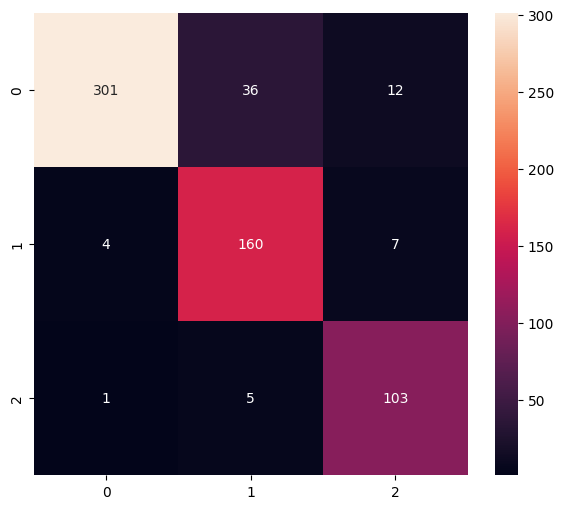

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       349
           1       0.80      0.94      0.86       171
           2       0.84      0.94      0.89       109

    accuracy                           0.90       629
   macro avg       0.87      0.91      0.89       629
weighted avg       0.91      0.90      0.90       629



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/82/6d45jxmx7dv9k2cnwz70lq2c0000gn/T/tmpuw2bddyn/assets


INFO:tensorflow:Assets written to: /var/folders/82/6d45jxmx7dv9k2cnwz70lq2c0000gn/T/tmpuw2bddyn/assets


Saved artifact at '/var/folders/82/6d45jxmx7dv9k2cnwz70lq2c0000gn/T/tmpuw2bddyn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  14413719952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14413722064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14413719376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14413723216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14413722640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14413724368: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1746961617.949123 1497727 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746961617.949139 1497727 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1746961617.953340 1497727 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


6444

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/tobi/Documents/coe197z/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 331 μs, sys: 223 μs, total: 554 μs
Wall time: 529 μs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.0534374e-01 1.1599262e-02 4.8305464e-01 2.3306231e-06]
0
